# EDA and Visualization

In [1]:
import string
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('fake_job_postings.csv')

In [3]:
data.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [4]:
#dropping duplicate records if any
data.drop_duplicates(keep='first')

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0
5,6,Accounting Clerk,"US, MD,",NaN,NaN,NaN,Job OverviewApex is an environmental consultin...,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,0
6,7,Head of Content (m/f),"DE, BE, Berlin",ANDROIDPIT,20000-28000,"Founded in 2009, the Fonpit AG rose with its i...",Your Responsibilities: Manage the English-spea...,Your Know-How: ...,Your Benefits: Being part of a fast-growing co...,0,1,1,Full-time,Mid-Senior level,Master's Degree,Online Media,Management,0
7,8,Lead Guest Service Specialist,"US, CA, San Francisco",NaN,NaN,Airenvy’s mission is to provide lucrative yet ...,Who is Airenvy?Hey there! We are seasoned entr...,"Experience with CRM software, live chat, and p...",Competitive Pay. You'll be able to eat steak e...,0,1,1,NaN,NaN,NaN,NaN,NaN,0
8,9,HP BSM SME,"US, FL, Pensacola",NaN,NaN,Solutions3 is a woman-owned small business who...,Implementation/Configuration/Testing/Training ...,MUST BE A US CITIZEN.An active TS/SCI clearanc...,NaN,0,1,1,Full-time,Associate,NaN,Information Technology and Services,NaN,0
9,10,Customer Service Associate - Part Time,"US, AZ, Phoenix",NaN,NaN,"Novitex Enterprise Solutions, formerly Pitney ...",The Customer Service Associate will be based i...,Minimum Requirements:Minimum of 6 months custo...,NaN,0,1,0,Part-time,Entry level,High School or equivalent,Financial Services,Customer Service,0


In [5]:
#Counting the total NaN values for each column in the dataframe
print(data.isnull().sum())

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64


In [6]:
#Finding the percentage of missing data in each column
percent_missing = data.isnull().sum() * 100 / len(data)
missing_values_data = pd.DataFrame({'percent_missing': percent_missing})
print(missing_values_data)

                     percent_missing
job_id                      0.000000
title                       0.000000
location                    1.935123
department                 64.580537
salary_range               83.959732
company_profile            18.501119
description                 0.005593
requirements               15.072707
benefits                   40.324385
telecommuting               0.000000
has_company_logo            0.000000
has_questions               0.000000
employment_type            19.412752
required_experience        39.429530
required_education         45.329978
industry                   27.421700
function                   36.101790
fraudulent                  0.000000


This missing data can be concluded to be MNAR (missing not at random) which is also known as non-ignorable non-response, which is neither MAR nor MCAR. The values of the variables that are missing are related to the reason it's missing. The missingness is informative and it not possible to know about missing values from the data.

'Title' and other binary columns like 'telecommuting', 'has_company_logo' and 'has_questions' do not have any missing values. For now, the other categorical column's missing values will be filled with 'missing' to make the data visualization easier to understand.

In [7]:
#Filling the empty cells with 'Missing'
columns=['location','department','salary_range','company_profile','description','requirements','benefits','employment_type','required_experience','required_education','industry','function']
for i in columns:
    data[i]=data[i].fillna(value='Missing')

In [8]:
#Ensuring that all missing cells have been filled
print(data.isnull().sum())

job_id                 0
title                  0
location               0
department             0
salary_range           0
company_profile        0
description            0
requirements           0
benefits               0
telecommuting          0
has_company_logo       0
has_questions          0
employment_type        0
required_experience    0
required_education     0
industry               0
function               0
fraudulent             0
dtype: int64


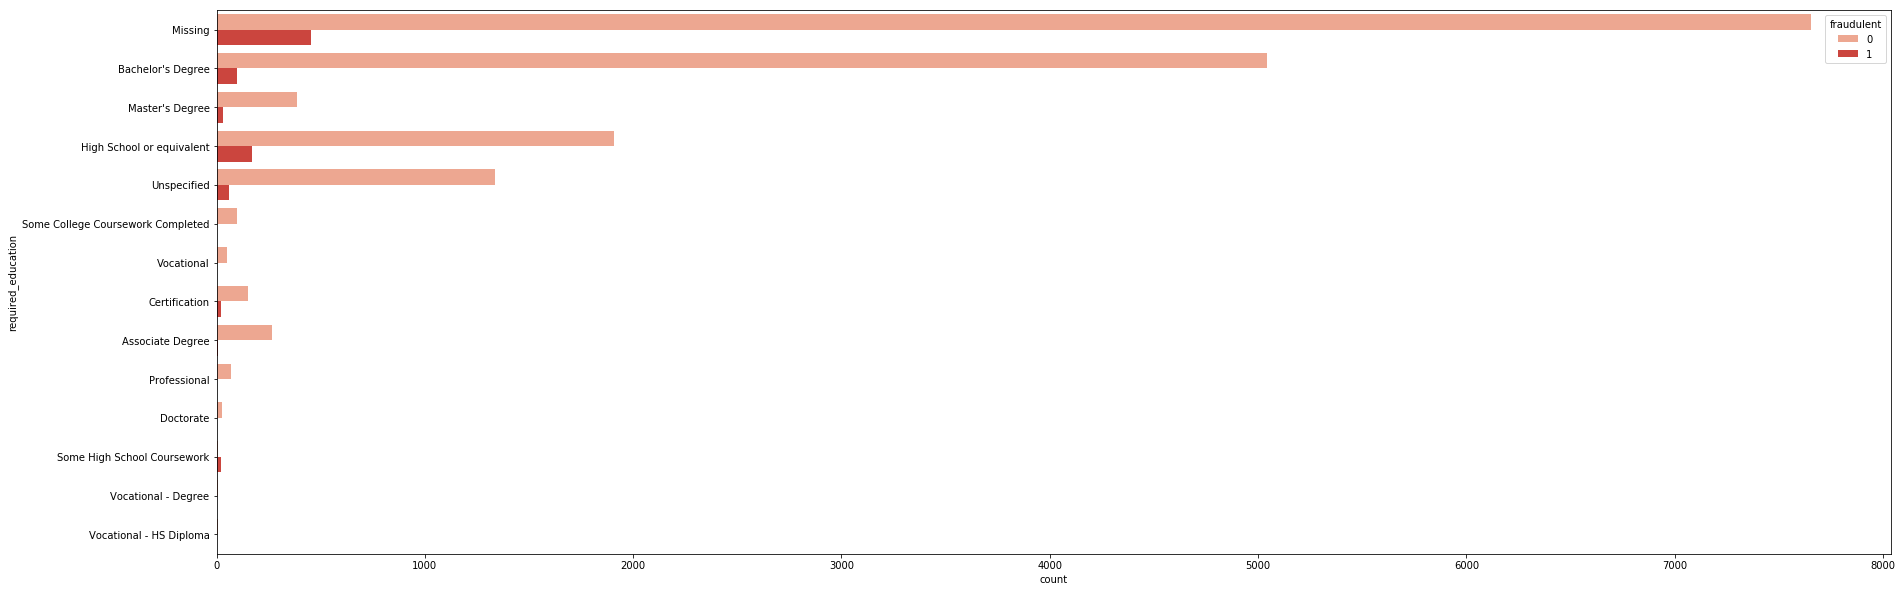

In [9]:
chart=data[['required_education','fraudulent']]
plt.figure(figsize=(30,10))
sns.countplot(palette='Reds',hue='fraudulent',y='required_education',data=chart)
plt.show();

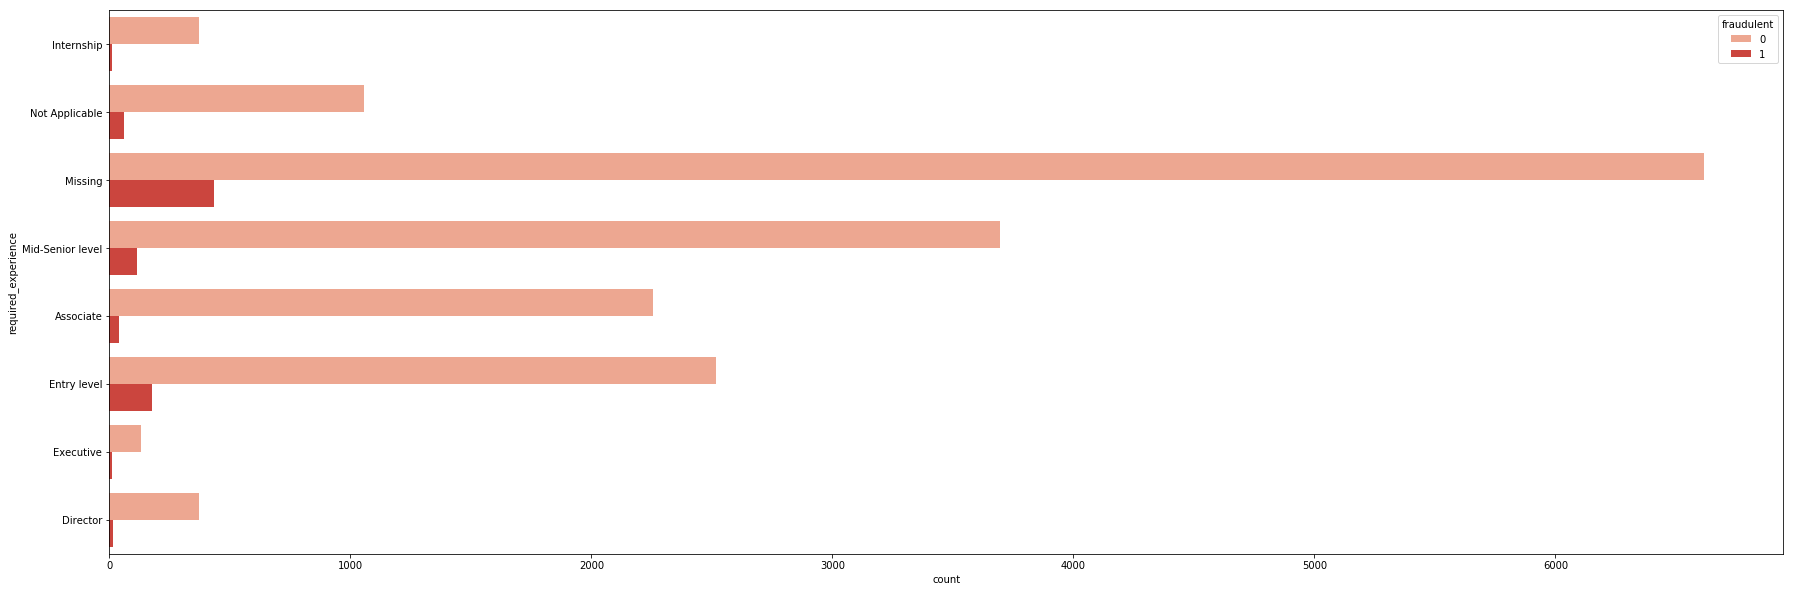

In [10]:
chart=data[['required_experience','fraudulent']]
plt.figure(figsize=(30,10))
sns.countplot(palette='Reds',hue='fraudulent',y='required_experience',data=chart)
plt.show();

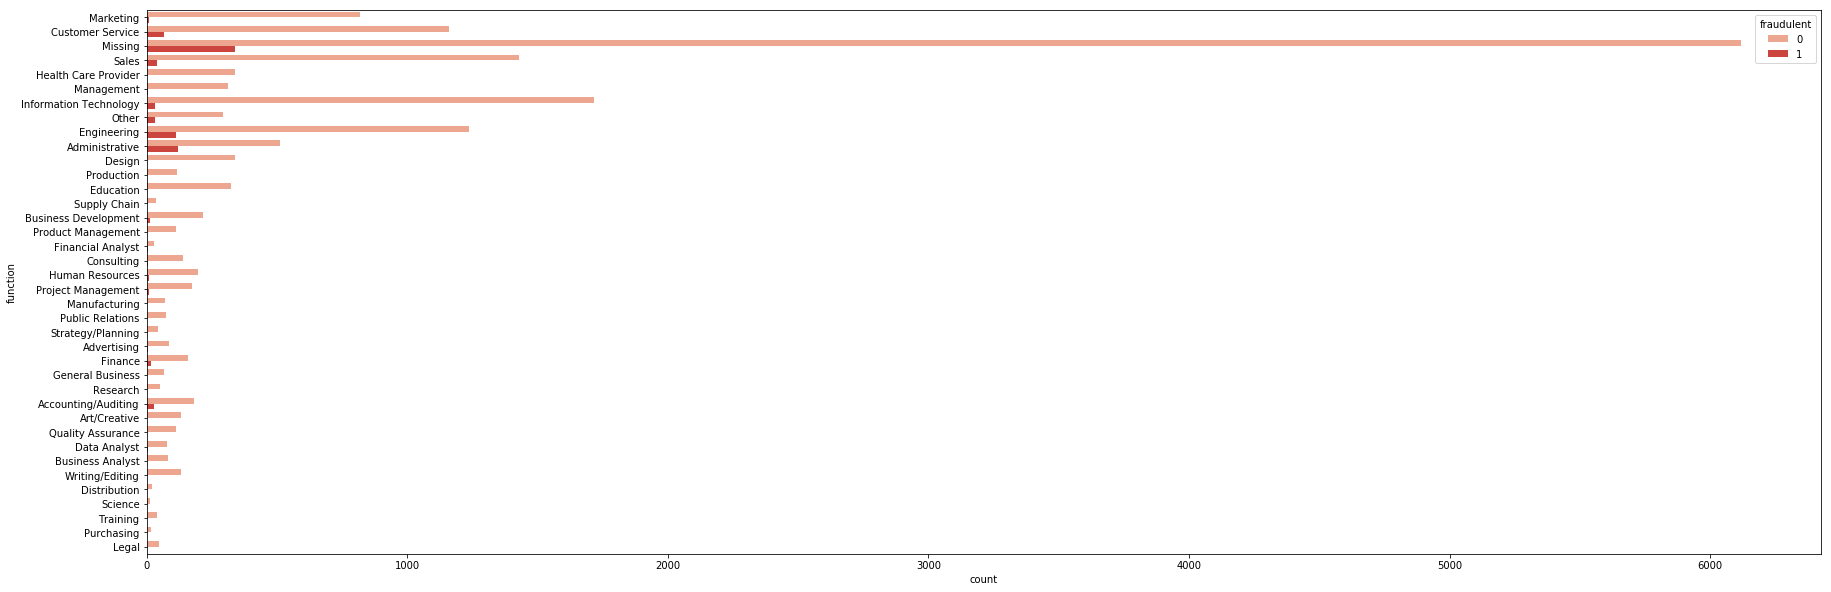

In [11]:
chart=data[['function','fraudulent']]
plt.figure(figsize=(30,10))
sns.countplot(palette='Reds',hue='fraudulent',y='function',data=chart)
plt.show();

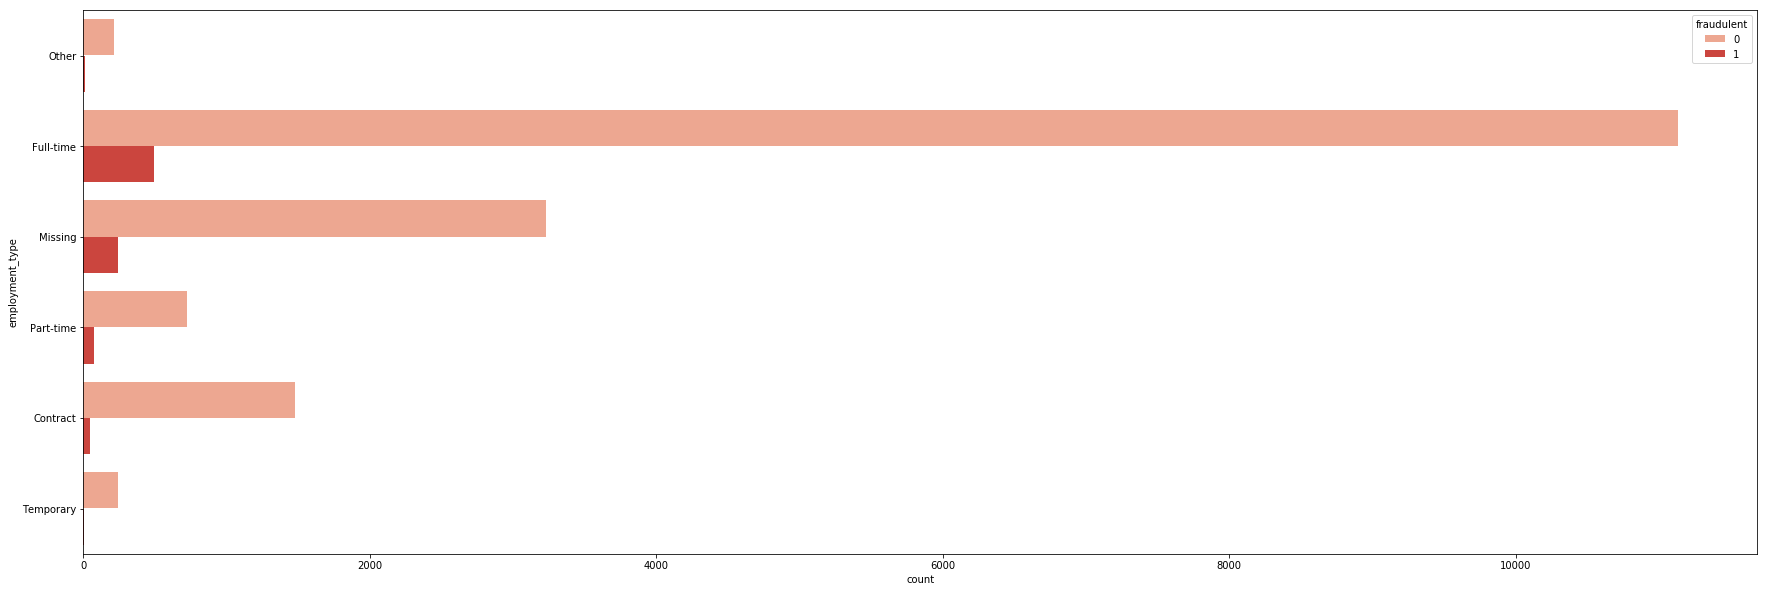

In [12]:
chart=data[['employment_type','fraudulent']]
plt.figure(figsize=(30,10))
sns.countplot(palette='Reds',hue='fraudulent',y='employment_type',data=chart)
plt.show();

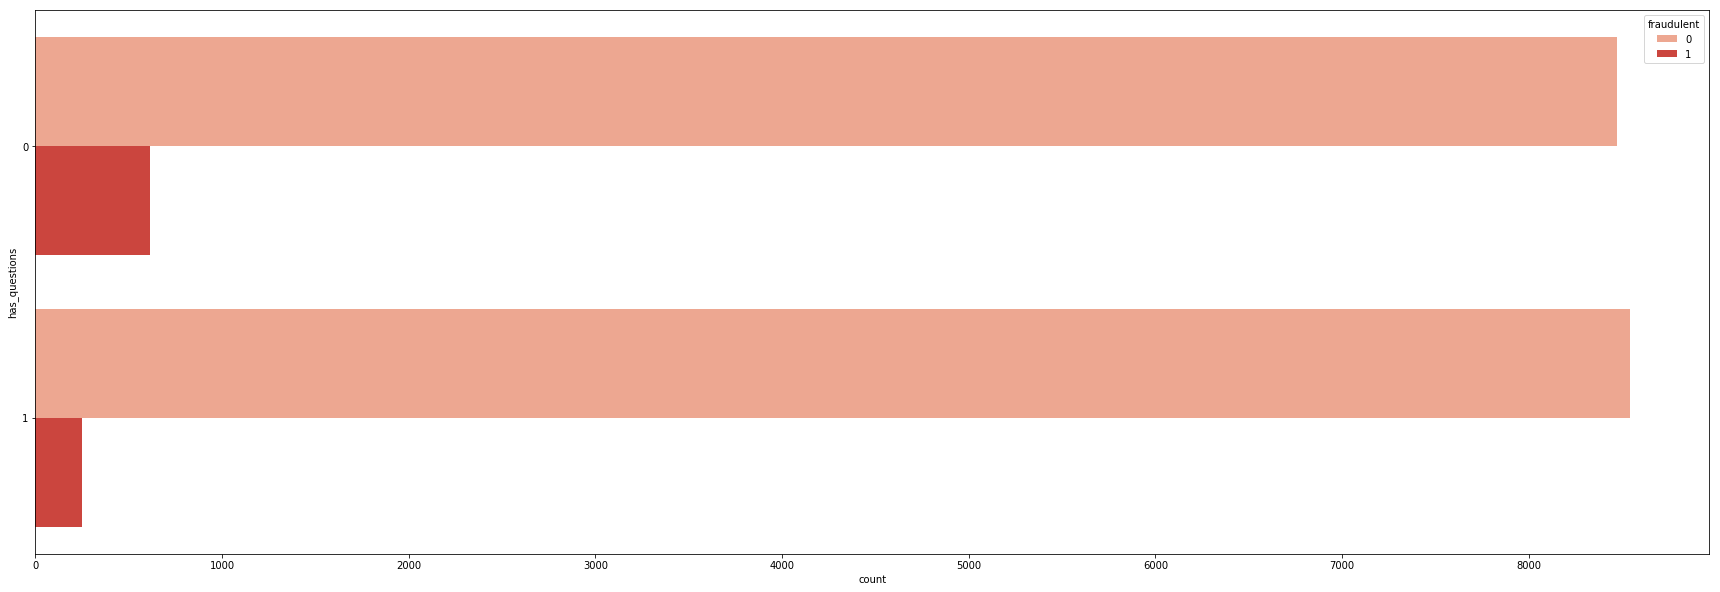

In [13]:
chart=data[['has_questions','fraudulent']]
plt.figure(figsize=(30,10))
sns.countplot(palette='Reds',hue='fraudulent',y='has_questions',data=chart)
plt.show();

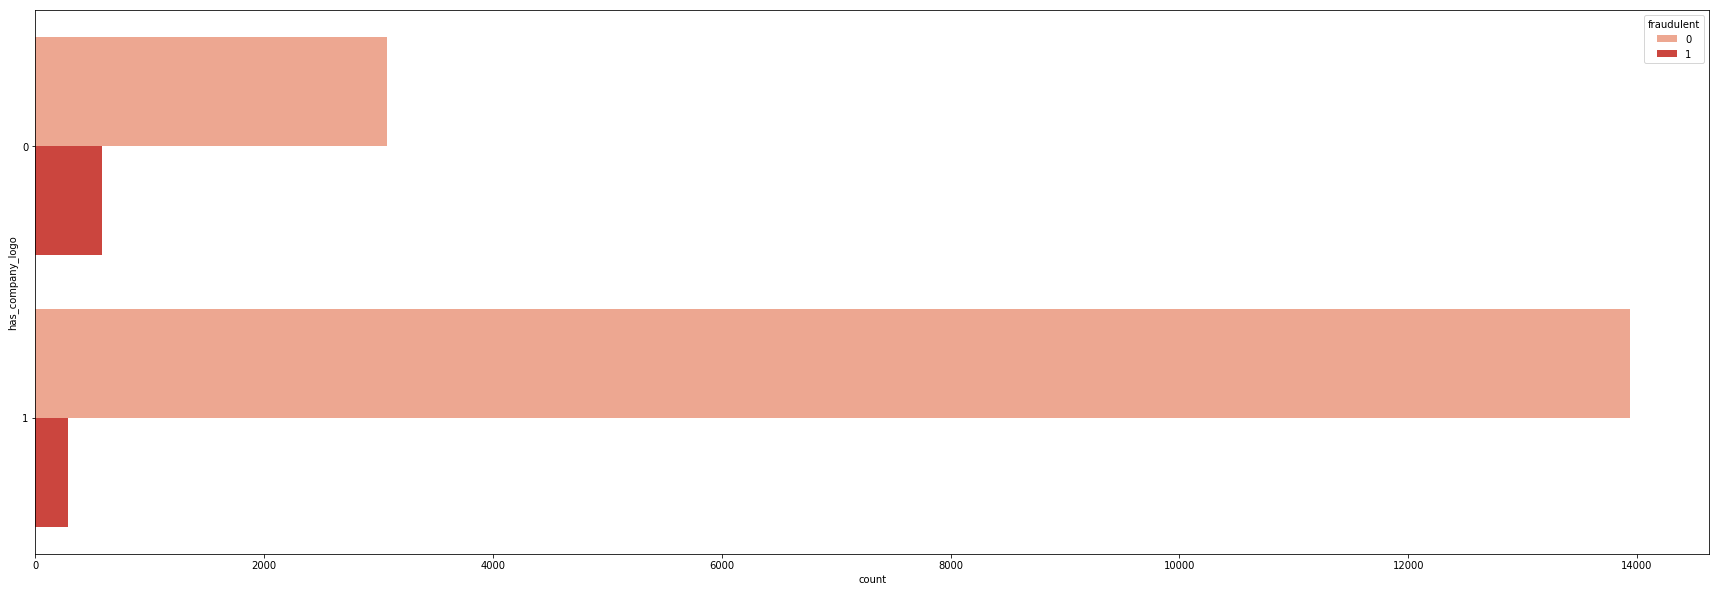

In [14]:
chart=data[['has_company_logo','fraudulent']]
plt.figure(figsize=(30,10))
sns.countplot(palette='Reds',hue='fraudulent',y='has_company_logo',data=chart)
plt.show();

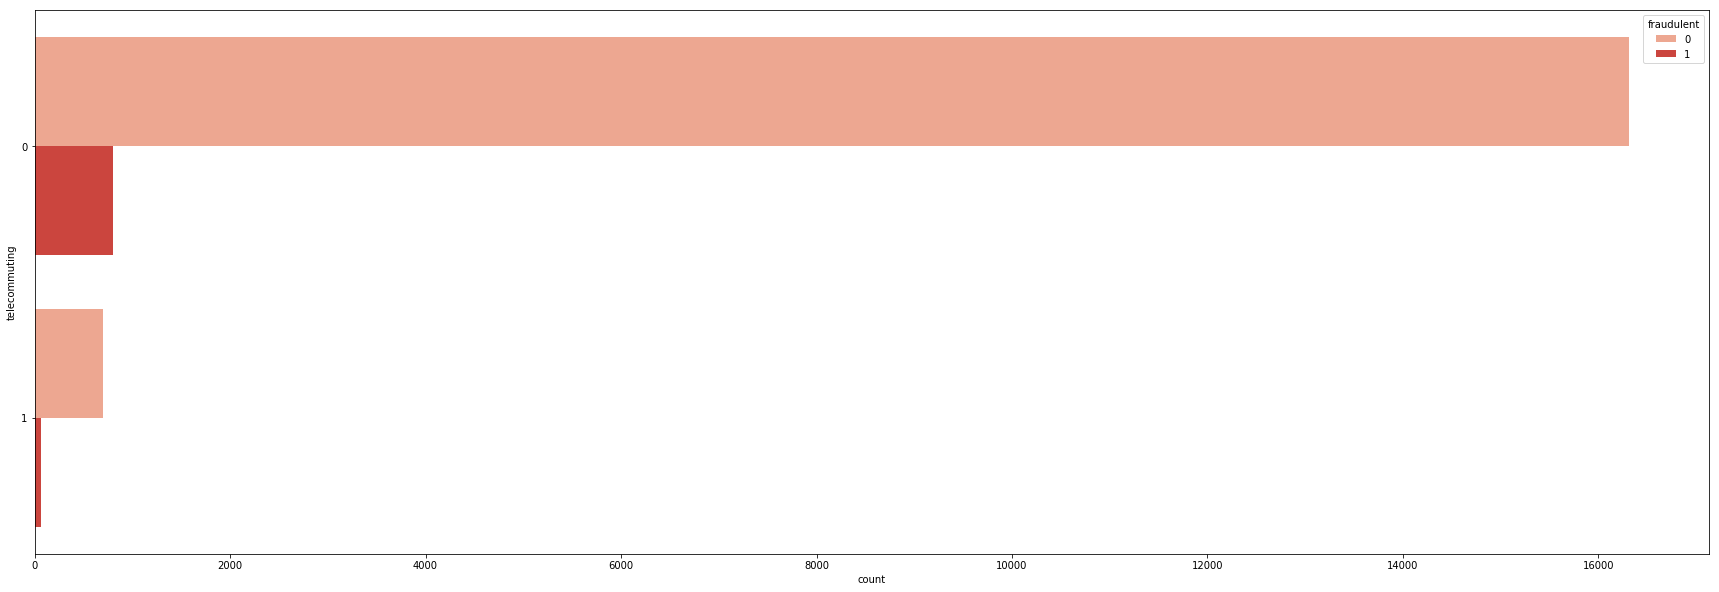

In [15]:
chart=data[['telecommuting','fraudulent']]
plt.figure(figsize=(30,10))
sns.countplot(palette='Reds',hue='fraudulent',y='telecommuting',data=chart)
plt.show();